<a href="https://colab.research.google.com/github/Suryaa1309/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data.drop("company",axis=1,inplace=True)
data.drop("agent",axis=1,inplace=True)

In [ ]:
data["children"].fillna("0",inplace=True)
data["country"].fillna("others",inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.duplicated().value_counts()

False    87370
True     32020
dtype: int64

In [ ]:
new_ds=data.drop_duplicates()

In [ ]:
new_ds.duplicated().value_counts()

False    87370
dtype: int64

In [ ]:
new_ds.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [ ]:
from pandas.io.formats.format import DataFrameFormatter
def var(new_ds):
    unique_list = pd.DataFrame([[i,len(new_ds[i].unique())] for i in new_ds.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(new_ds.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(new_ds)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'WaitingDays', 'ArrivingWeek', 'ArrivingDate', 'LeadTime', 'PrevCancel', 'ChangeBooking', 'PrevBook', 'Adults', 'WeekStay', 'WeekendStay', 'ReservationDate', 'ADR'} 

Categorical Variables( 18 )
 {'Hotel', 'ArrivingYear', 'RepeatGuest', 'AssignRoomType', 'DistChannel', 'Meal', 'ArrivingMonth', 'Segment', 'Reservation', 'BookRoomType', 'Country', 'Babies', 'DepositType', 'ParkSpace', 'SpecialRequest', 'CustomerType', 'Canceled', 'Children'}


In [ ]:
new_ds[con_var].describe()

,WaitingDays,ArrivingWeek,ArrivingDate,LeadTime,PrevCancel,ChangeBooking,PrevBook,Adults,WeekStay,WeekendStay,ADR
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.749788,26.838549,15.815967,79.900595,0.030422,0.271661,0.184045,1.875873,2.625604,1.005414,106.343157
std,10.017213,13.674188,8.835216,86.055086,0.369200,0.727331,1.732148,0.626521,2.053693,1.031980,55.016143
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,16.000000,8.000000,11.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,72.000000
50%,0.000000,27.000000,16.000000,49.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,98.100000
75%,0.000000,37.000000,23.000000,125.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,134.000000
max,391.000000,53.000000,31.000000,737.000000,26.000000,21.000000,72.000000,55.000000,50.000000,19.000000,5400.000000


In [ ]:
new_ds.loc[new_ds.LeadTime      > 500,'LeadTime'     ]=500
new_ds.loc[new_ds.WaitingDays   >   0,'WaitingDays'  ]=  1
new_ds.loc[new_ds.WeekendStay   >=  5,'WeekendStay'  ]=  5
new_ds.loc[new_ds.Adults        >   4,'Adults'       ]=  4
new_ds.loc[new_ds.PrevBook      >   0,'PrevBook'     ]=  1
new_ds.loc[new_ds.PrevCancel    >   0,'PrevCancel'   ]=  1
new_ds.loc[new_ds.WeekStay      >  10,'WeekStay'     ]= 10
new_ds.loc[new_ds.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(new_ds.columns) - cat_var

new_ds[con_var].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,WaitingDays,ArrivingWeek,ArrivingDate,LeadTime,ChangeBooking,Adults,WeekStay,WeekendStay,ADR
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.009843,26.838549,15.815967,79.853840,0.266339,1.872084,2.601064,0.999290,106.343157
std,0.098724,13.674188,8.835216,85.801085,0.666664,0.511319,1.892739,0.994404,55.016143
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,16.000000,8.000000,11.000000,0.000000,2.000000,1.000000,0.000000,72.000000
50%,0.000000,27.000000,16.000000,49.000000,0.000000,2.000000,2.000000,1.000000,98.100000
75%,0.000000,37.000000,23.000000,125.000000,0.000000,2.000000,4.000000,2.000000,134.000000
max,1.000000,53.000000,31.000000,500.000000,5.000000,4.000000,10.000000,5.000000,5400.000000


In [ ]:
new_ds[cat_var].describe()

,PrevBook,ParkSpace,RepeatGuest,Canceled,ArrivingYear,PrevCancel,Babies,SpecialRequest
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.040575,0.084251,0.039087,0.274934,2016.210312,0.019286,0.010805,0.698649
std,0.197304,0.281571,0.193802,0.446484,0.686075,0.137528,0.113515,0.831985
min,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000,1.000000
max,1.000000,8.000000,1.000000,1.000000,2017.000000,1.000000,10.000000,5.000000


In [ ]:
new_ds.loc[new_ds.Babies    > 8,'Babies']    = 0
new_ds.loc[new_ds.ParkSpace > 5,'ParkSpace'] = 0

new_ds[cat_var].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,PrevBook,ParkSpace,RepeatGuest,Canceled,ArrivingYear,PrevCancel,Babies,SpecialRequest
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.040575,0.084068,0.039087,0.274934,2016.210312,0.019286,0.010587,0.698649
std,0.197304,0.279013,0.193802,0.446484,0.686075,0.137528,0.104012,0.831985
min,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,2017.000000,1.000000,2.000000,5.000000


In [ ]:
new_ds['ArrivingYear'] = new_ds['ArrivingYear'].astype('str')
new_ds['ArrivingMonth'] = new_ds['ArrivingMonth'].astype('str')
new_ds['ArrivingDate'] = new_ds['ArrivingDate'].astype('str')

new_ds['Canceled'] = new_ds['Canceled'].astype('str')
new_ds['RepeatGuest'] = new_ds['RepeatGuest'].astype('str')


In [ ]:
new_ds['Arrival Date'] = new_ds['ArrivingDate'] + '-' + new_ds['ArrivingMonth'] + '-' + new_ds['ArrivingYear']
new_ds['Arrival Date'] = pd.to_datetime(new_ds['Arrival Date'], errors='coerce')


In [ ]:
confirmed_bookings = new_ds[new_ds.Canceled=='0']
import datetime as dt
confirmed_bookings['ArrivingMonth'] = new_ds['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

In [ ]:
print('Total Bookings canceled')
print('-'*50)
print(new_ds.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(new_ds.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    63349
1    24021
Name: Canceled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.725066
1    0.274934
Name: Canceled, dtype: float64


In [ ]:
new_ds.Country.value_counts(normalize=True)

PRT    0.314067
GBR    0.119389
FRA    0.101145
ESP    0.082980
DEU    0.061634
         ...   
MMR    0.000011
BFA    0.000011
CYM    0.000011
MLI    0.000011
KHM    0.000011
Name: Country, Length: 178, dtype: float64

In [ ]:
new_ds.ArrivingMonth.value_counts(normalize=True)

August       0.128809
July         0.115062
May          0.095605
April        0.090489
June         0.088863
March        0.085968
October      0.079364
September    0.076548
February     0.069761
December     0.058704
November     0.057136
January      0.053691
Name: ArrivingMonth, dtype: float64

In [ ]:
new_ds.Segment.value_counts(normalize=True)

Online TA        0.590695
Offline TA/TO    0.158876
Direct           0.135081
Groups           0.056553
Corporate        0.048140
Complementary    0.008035
Aviation         0.002598
Undefined        0.000023
Name: Segment, dtype: float64

In [ ]:
new_ds.ArrivingYear.value_counts(normalize=True)

2016    0.485075
2017    0.362619
2015    0.152306
Name: ArrivingYear, dtype: float64

In [ ]:
new_ds.Meal.value_counts(normalize=True)

BB           0.777796
SC           0.108504
HB           0.103960
Undefined    0.005631
FB           0.004109
Name: Meal, dtype: float64

In [ ]:
new_ds.CustomerType.value_counts(normalize=True)

Transient          0.823704
Transient-Party    0.134142
Contract           0.035928
Group              0.006226
Name: CustomerType, dtype: float64

In [ ]:
new_ds.Reservation.value_counts(normalize=True)

Check-Out    0.725066
Canceled     0.263328
No-Show      0.011606
Name: Reservation, dtype: float64

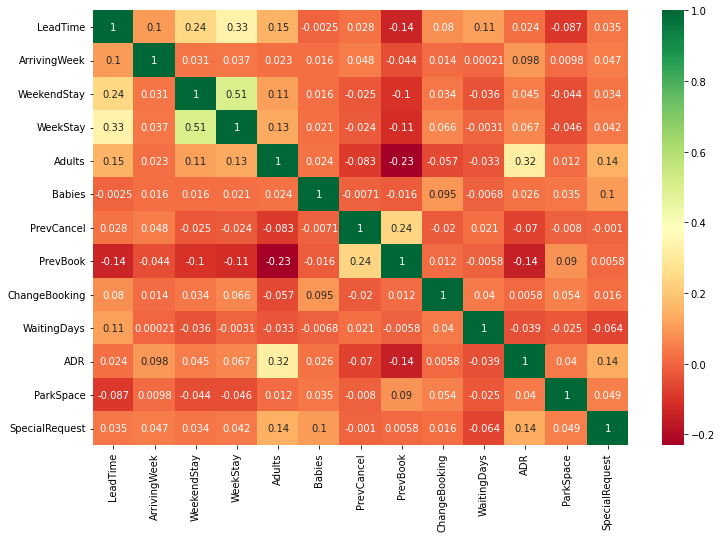

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(new_ds.corr(),annot=True,cmap='RdYlGn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


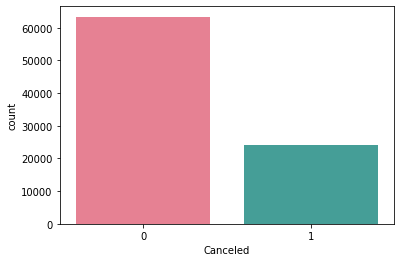

In [ ]:
canceled_data = new_ds['Canceled']
sns.countplot(canceled_data, palette='husl')


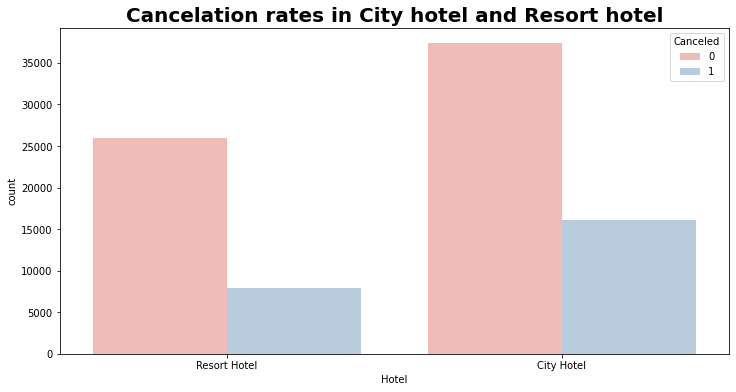

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=new_ds,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

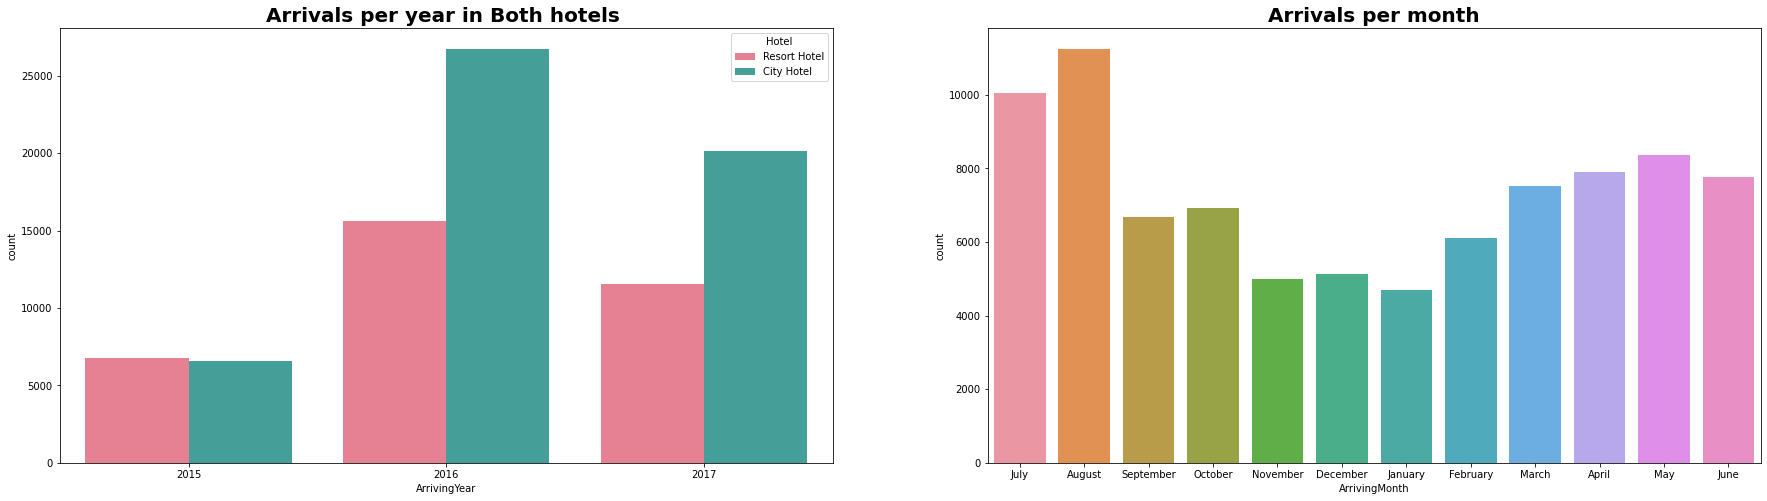

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=new_ds,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

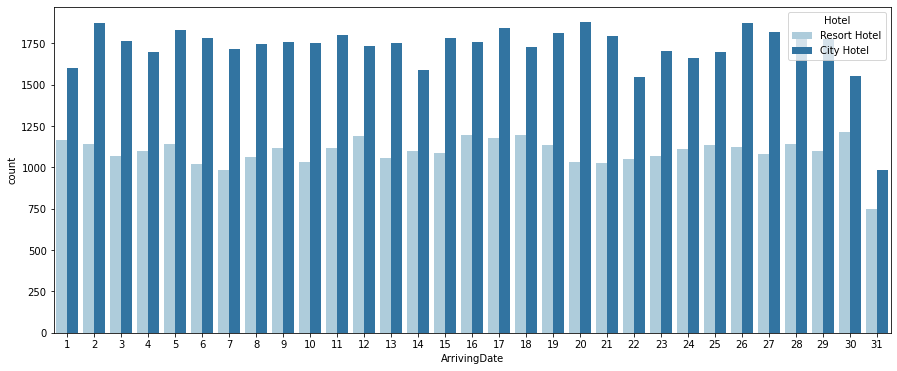

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data = new_ds, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

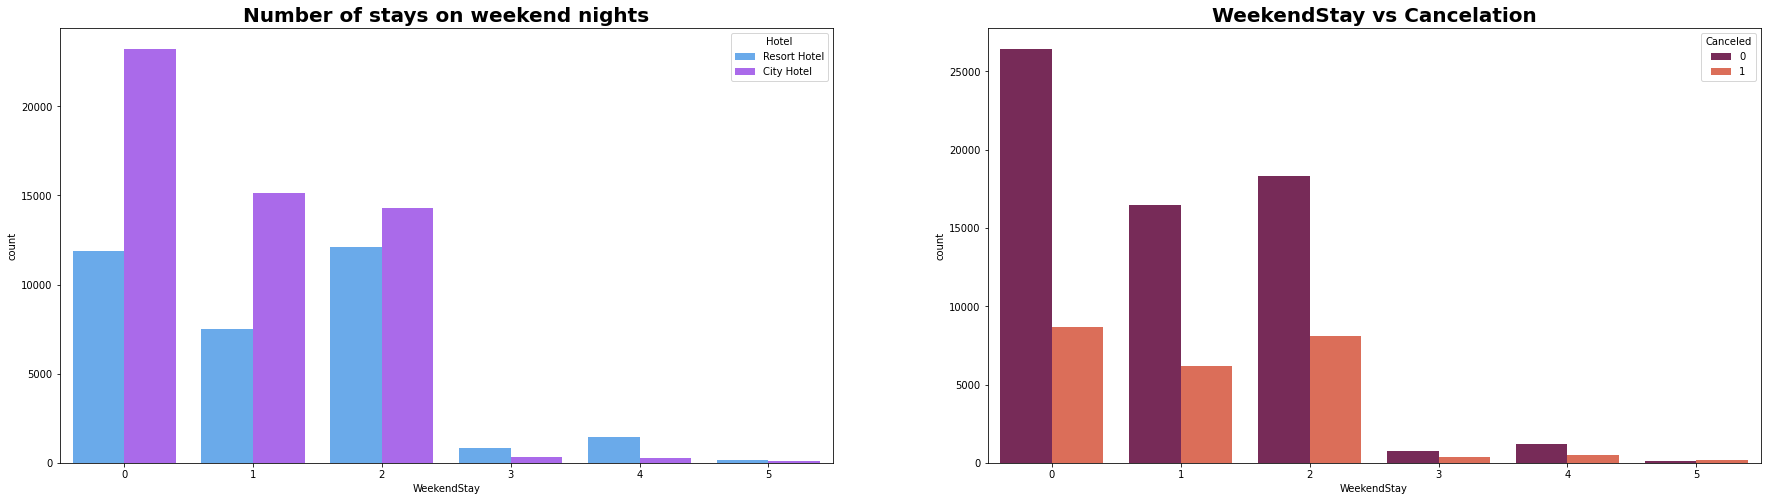

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=new_ds, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

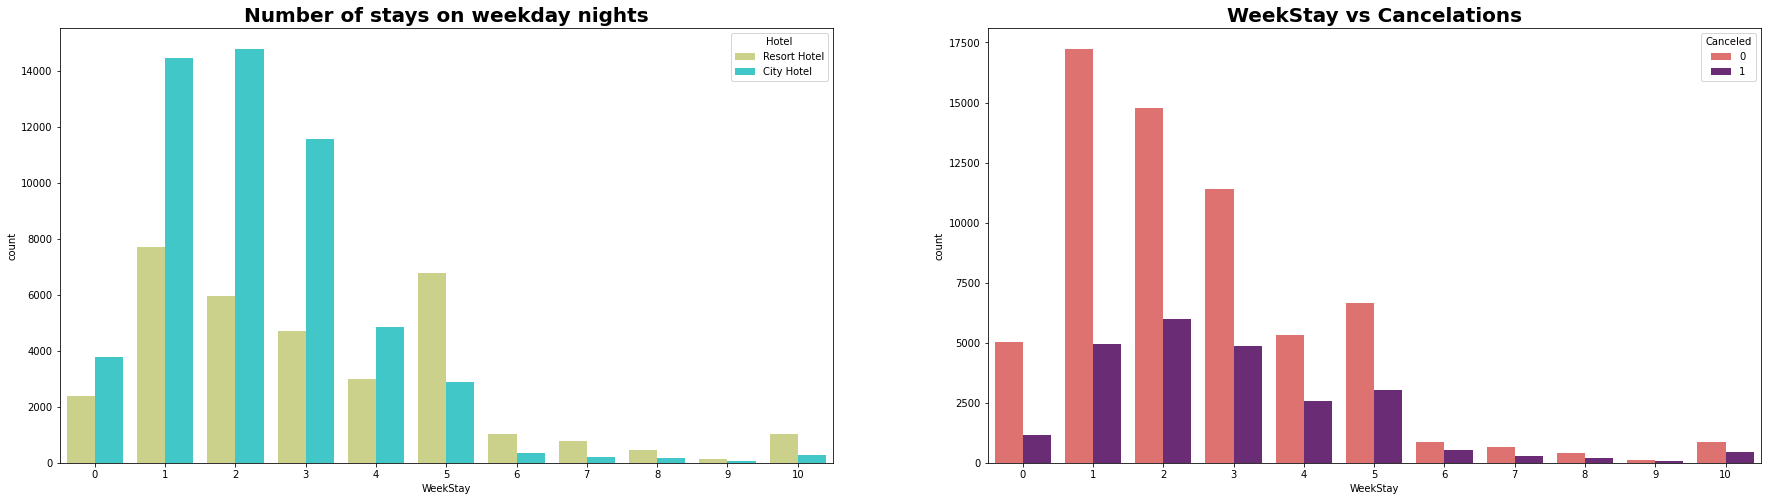

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=new_ds, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show

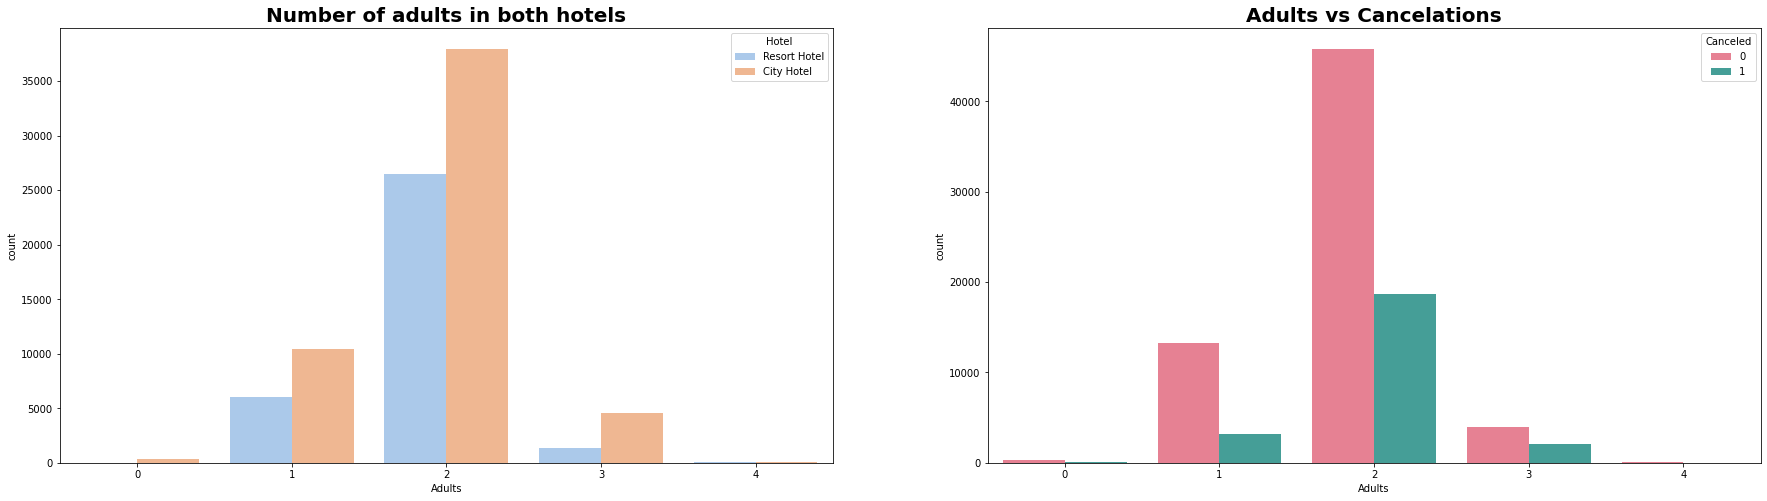

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=new_ds, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

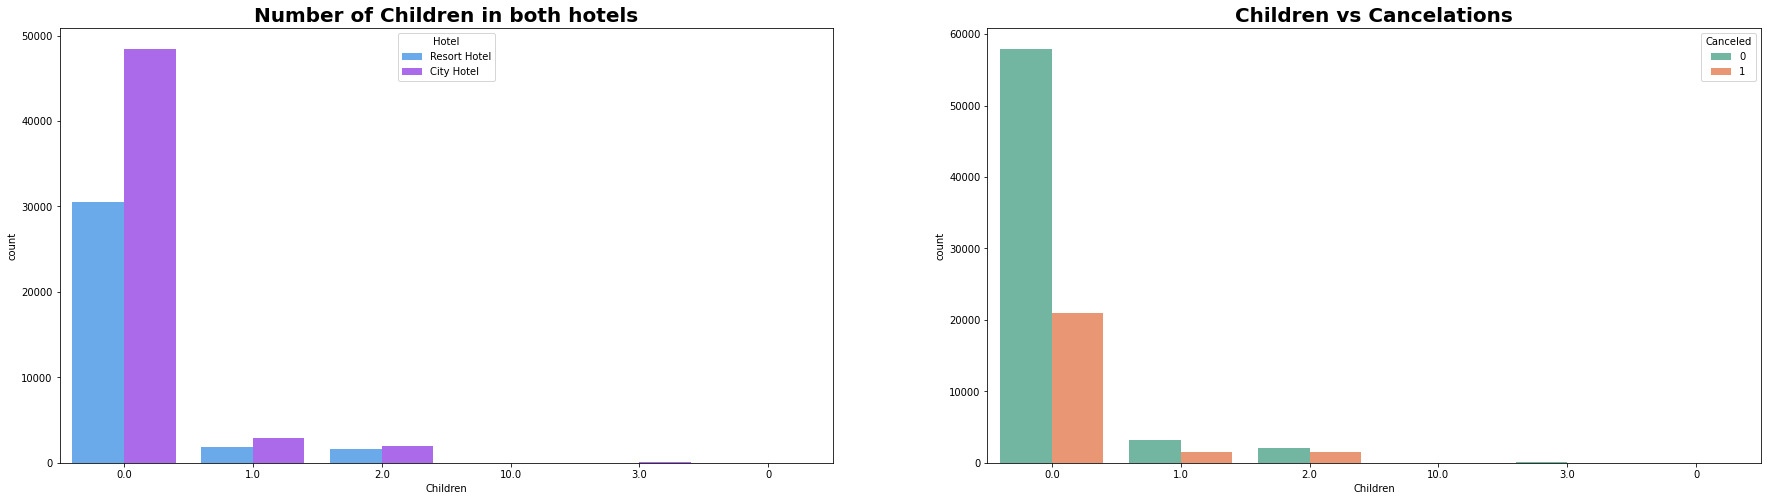

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=new_ds, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

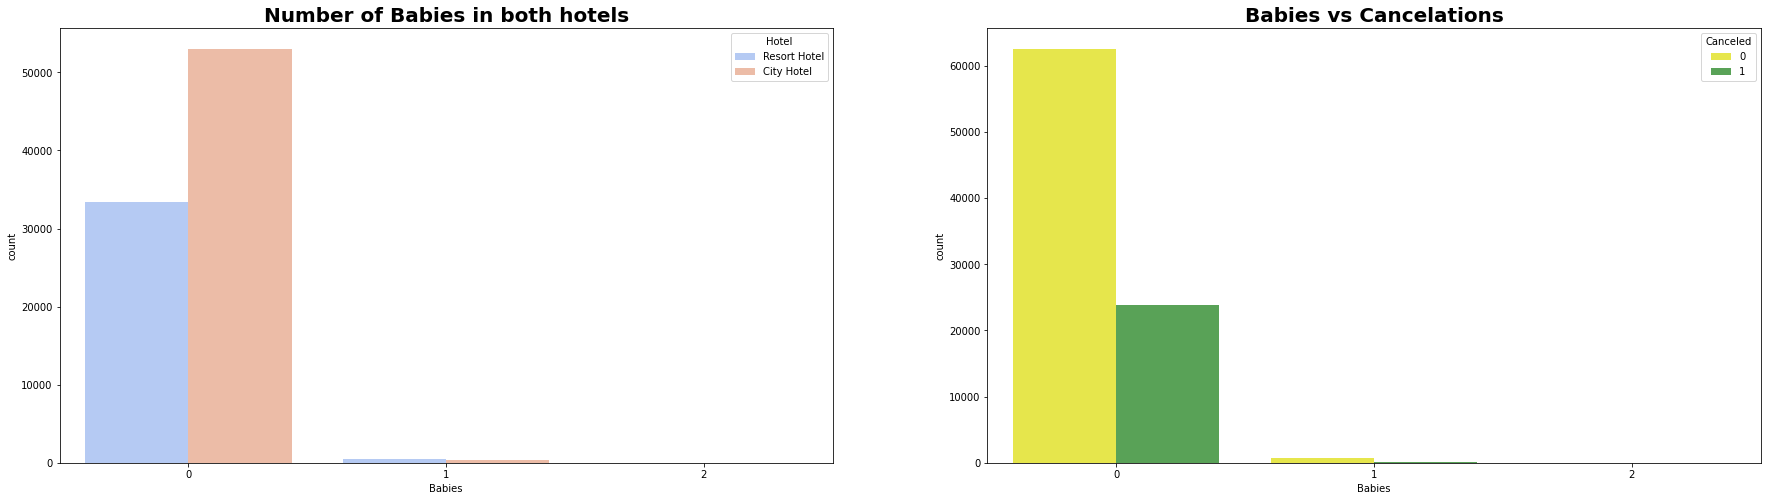

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=new_ds, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = new_ds, x = 'Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

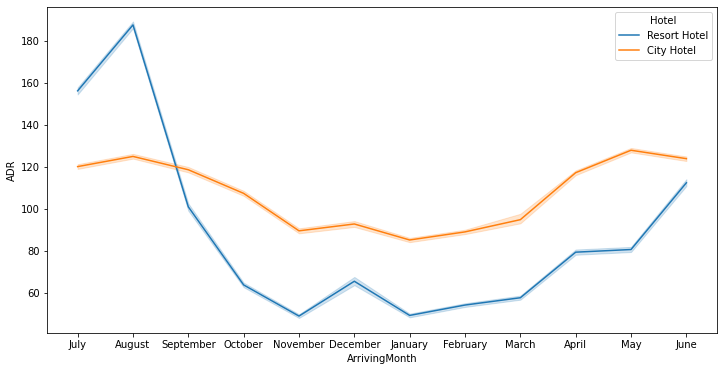

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= new_ds)
plt.show()